In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression as LR,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR, RandomForestRegressor as RFR
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.externals import joblib

import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_16_Auto_Insurance_Claims_amount.csv')

In [3]:
data

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [4]:
data.shape

(9134, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [6]:
data.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [7]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(" Unique values of ",col)
        print(data[col].unique())
        print("")
        print("Vlaue count")
        print(data[col].value_counts())
        print("--------------------------------------------------------------------------------------------------------")

 Unique values of  Customer
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']

Vlaue count
XI58886    1
BB11622    1
SW74846    1
TV53243    1
HE84643    1
          ..
UI36374    1
JO98946    1
RL64888    1
QV40364    1
KF50730    1
Name: Customer, Length: 9134, dtype: int64
--------------------------------------------------------------------------------------------------------
 Unique values of  Country
['US']

Vlaue count
US    9134
Name: Country, dtype: int64
--------------------------------------------------------------------------------------------------------
 Unique values of  State Code
['KS' 'NE' 'OK' 'MO' 'IA']

Vlaue count
MO    3150
IA    2601
NE    1703
OK     882
KS     798
Name: State Code, dtype: int64
--------------------------------------------------------------------------------------------------------
 Unique values of  State
['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']

Vlaue count
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma  

#From the above information, we can remove few columns from datasets such as 

'Customer' as it is unique for each entry and wll not be usefull.

'Country' as it has only one unique value.

We can also remove one from State and State Code as it has same values.

Also can remove Effective Date as it is of same year and it almost have same value count for each unique value.

In [8]:
#Droping columns from dataset

data.drop(["Customer","Country","State Code","Effective To Date"],axis=1,inplace=True)

In [9]:
data.head(10)

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
5,Iowa,825.629780,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,...,94,0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize
6,Iowa,538.089864,Yes,Basic,College,Employed,F,55350,Suburban,Married,...,13,0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize
7,Nebraska,721.610031,No,Premium,Master,Unemployed,M,0,Urban,Single,...,68,0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize
8,Iowa,2412.750402,Yes,Basic,Bachelor,Medical Leave,M,14072,Suburban,Divorced,...,3,0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize
9,Iowa,738.817808,No,Extended,College,Employed,F,28812,Urban,Married,...,7,0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize


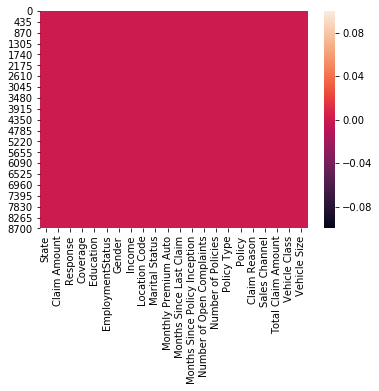

In [10]:
#Checking for Null values

sns.heatmap(data.isnull())

As we can see, no null values are present in dataset.

In [11]:
data.columns

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(" Unique values of ",col)
        print(data[col].unique())
        print("")
        print("Vlaue count")
        print(data[col].value_counts())
        print("--------------------------------------------------------------------------------------------------------")

 Unique values of  State
['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']

Vlaue count
Missouri    3150
Iowa        2601
Nebraska    1703
Oklahoma     882
Kansas       798
Name: State, dtype: int64
--------------------------------------------------------------------------------------------------------
 Unique values of  Response
['No' 'Yes']

Vlaue count
No     7826
Yes    1308
Name: Response, dtype: int64
--------------------------------------------------------------------------------------------------------
 Unique values of  Coverage
['Basic' 'Extended' 'Premium']

Vlaue count
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
--------------------------------------------------------------------------------------------------------
 Unique values of  Education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Vlaue count
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doct

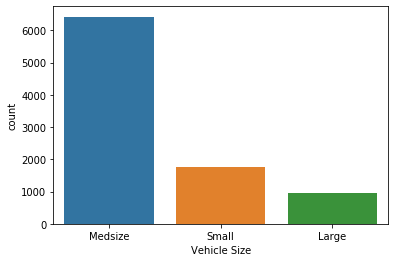

In [13]:
#Checkign claim with vehicle size

sns.countplot(x='Vehicle Size',data=data)
plt.show()

Medsize vehicle has more claim than other

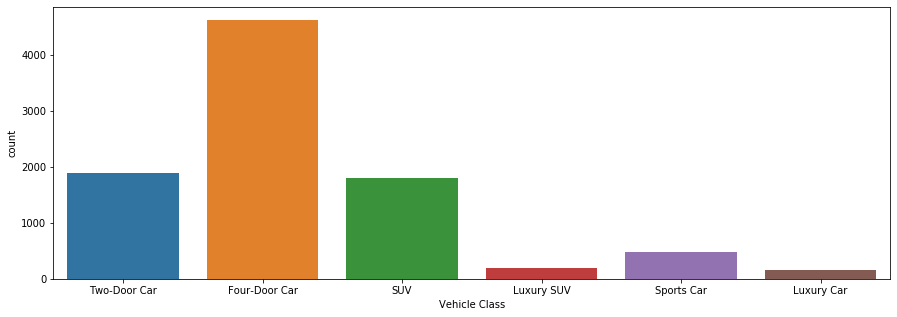

In [14]:
#Checkign claim with Vehicle Class
plt.figure(figsize=(15,5))
sns.countplot(x='Vehicle Class',data=data)
plt.show()

As we can see, Four-Door car has more claimed, Two-Door car and SUV have moderate claim. Others have very low claim

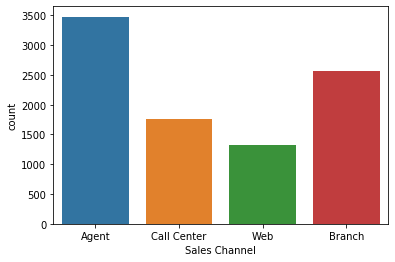

In [15]:
#Checkign claim with Sales Channel

sns.countplot(x='Sales Channel',data=data)
plt.show()


Agent and call center have more claim than Branch and Web

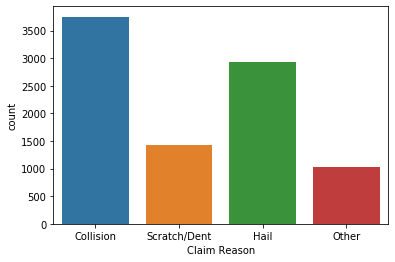

In [16]:
#Checkign claim with Claim Reason

sns.countplot(x='Claim Reason',data=data)
plt.show()

Collision and Hail are the main reason for Insurance Claim

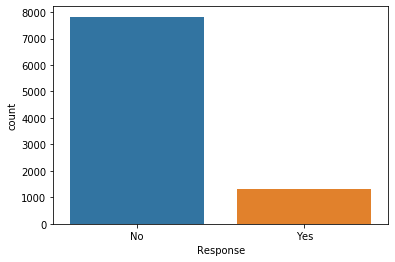

In [17]:
#Checkign claim with Claim Response

sns.countplot(x='Response',data=data)
plt.show()

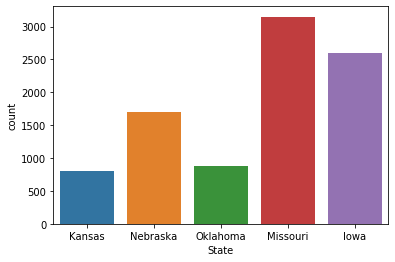

In [18]:
#Checkign claim with State

sns.countplot(x='State',data=data)
plt.show()

Missouri and Lowa having more claim

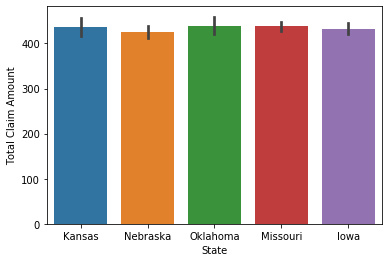

In [19]:
#Checkign average claim with State 

sns.barplot(x='State',y='Total Claim Amount',data=data)
plt.show()

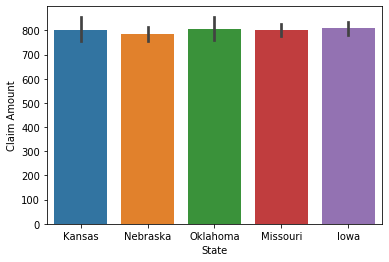

In [20]:
#Checkign average claim with Claim Amount 

sns.barplot(x='State',y='Claim Amount',data=data)
plt.show()

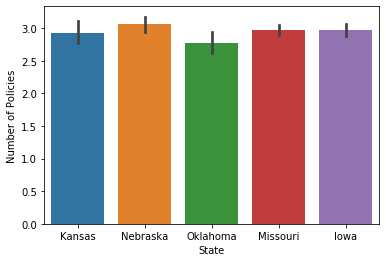

In [21]:
#Checkign average no of policies

sns.barplot(x='State',y='Number of Policies',data=data)
plt.show()

Nebraska is having high average for policies

In [22]:
#Encoding object/categorical data using Label Encoder

le = LE()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [23]:
#Checking for Correlation

data.corr()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,-0.006629,-0.001732,0.007558,0.004256,-0.004054,0.000545,0.002682,0.001382,-0.008975,...,-0.004459,0.014814,-0.005993,-0.009102,-0.014193,0.001845,0.002662,-0.000816,-0.004813,-0.000956
Claim Amount,-0.006629,1.000000,-0.008930,0.168040,0.026038,-0.034846,-0.013610,0.024366,0.004854,-0.026003,...,0.009418,-0.036343,0.021955,0.020011,0.015217,-0.052004,-0.003941,0.226451,0.082307,0.017098
Response,-0.001732,-0.008930,1.000000,0.000642,0.000285,-0.016703,0.004396,0.011932,0.001729,-0.094843,...,0.002952,-0.009881,-0.020891,0.001110,-0.001461,-0.161332,-0.086607,0.016877,0.021225,-0.050691
Coverage,0.007558,0.168040,0.000642,1.000000,0.021573,0.003239,-0.014448,-0.010646,-0.020176,0.002956,...,0.010658,-0.007971,-0.013515,0.001469,-0.002317,-0.041627,-0.024638,0.279078,-0.017682,-0.003775
Education,0.004256,0.026038,0.000285,0.021573,1.000000,-0.025271,0.002206,0.018709,-0.011533,0.005675,...,0.004140,-0.023270,0.007266,0.011650,0.011119,0.049994,-0.005018,0.020730,0.010192,-0.005491
EmploymentStatus,-0.004054,-0.034846,-0.016703,0.003239,-0.025271,1.000000,0.034960,-0.726741,0.015921,0.311563,...,0.015376,0.007045,0.005035,-0.002240,-0.001159,-0.100479,-0.018346,0.330465,-0.002443,-0.011253
Gender,0.000545,-0.013610,0.004396,-0.014448,0.002206,0.034960,1.000000,-0.015138,0.003108,0.034027,...,0.004198,-0.003012,0.016258,-0.002227,-0.003123,0.031730,-0.020614,0.074564,0.020043,-0.000347
Income,0.002682,0.024366,0.011932,-0.010646,0.018709,-0.726741,-0.015138,1.000000,-0.027517,-0.231673,...,-0.000875,0.006408,-0.008656,0.002080,0.005032,0.115622,0.013494,-0.355254,0.004343,0.007945
Location Code,0.001382,0.004854,0.001729,-0.020176,-0.011533,0.015921,0.003108,-0.027517,1.000000,0.016452,...,0.007030,-0.002697,0.003066,0.015096,0.012086,-0.010815,-0.003953,0.254766,0.001870,0.021230
Marital Status,-0.008975,-0.026003,-0.094843,0.002956,0.005675,0.311563,0.034027,-0.231673,0.016452,1.000000,...,-0.029345,-0.000011,0.011664,0.013052,0.008139,-0.019937,-0.017967,0.204675,0.017597,0.017493


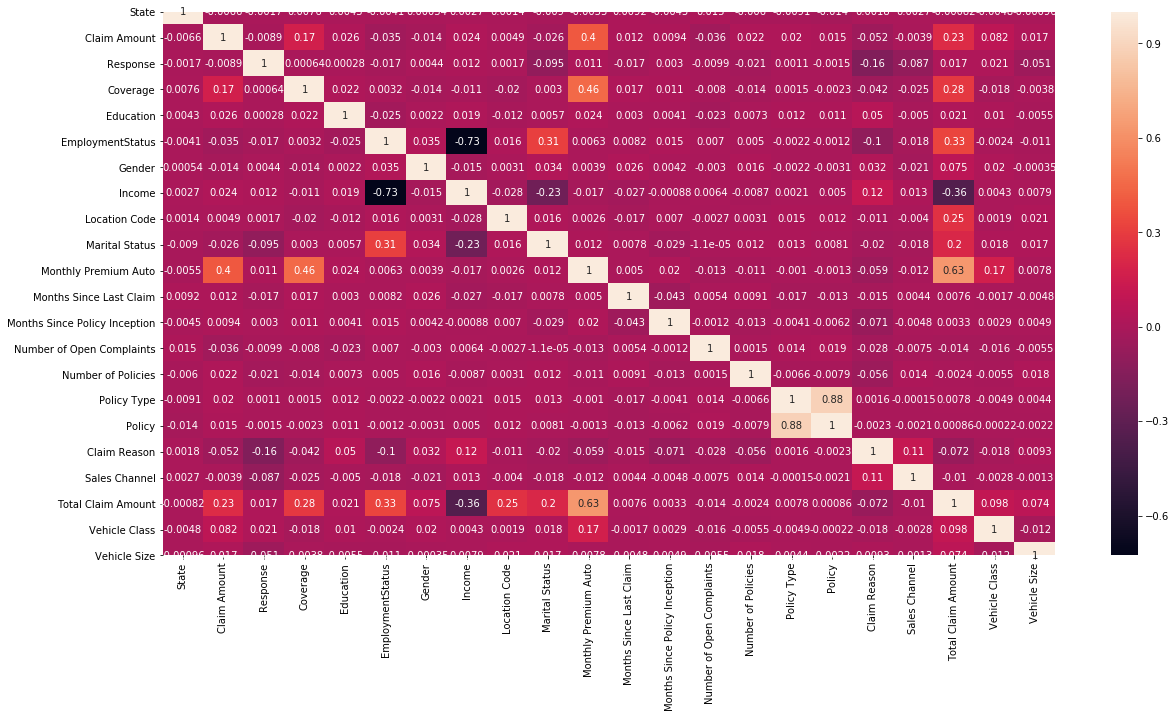

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

From the correlation, we xan see that Total Claim Amount is highly correlated with Monthly Premium, Employement Status, Coverage, Location Code. And negatively correlated with Income.

In [25]:
#Checking for description

data.describe()

,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,1.722684,800.494047,0.143201,0.480622,1.554084,1.825706,0.490037,37657.380009,0.979089,1.120210,...,48.064594,0.384388,2.966170,0.825925,3.797788,1.014889,1.102693,434.088794,1.892380,1.089556
std,1.312397,687.096761,0.350297,0.655817,1.381978,1.347793,0.499928,30379.904734,0.605732,0.636838,...,27.905991,0.910384,2.390182,0.475989,1.605978,1.072331,1.069452,290.500092,2.072992,0.537313
min,0.000000,189.800768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.099007,0.000000,0.000000
25%,0.000000,399.425179,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,24.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,272.258244,0.000000,1.000000
50%,2.000000,578.018220,0.000000,0.000000,1.000000,1.000000,0.000000,33889.500000,1.000000,1.000000,...,48.000000,0.000000,2.000000,1.000000,4.000000,1.000000,1.000000,383.945434,0.000000,1.000000
75%,3.000000,896.216704,0.000000,1.000000,3.000000,4.000000,1.000000,62320.000000,1.000000,2.000000,...,71.000000,0.000000,4.000000,1.000000,5.000000,2.000000,2.000000,547.514839,4.000000,1.000000
max,4.000000,8332.538119,1.000000,2.000000,4.000000,4.000000,1.000000,99981.000000,2.000000,2.000000,...,99.000000,5.000000,9.000000,2.000000,8.000000,3.000000,3.000000,2893.239678,5.000000,2.000000


There is a huge difference between mean and max of Claim Amount and Income. Will check outliers for the same

State                               AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Claim Amount                     AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Response                         AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
Coverage                         AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Education                        AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
EmploymentStatus                 AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
Gender                           AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
Income                           AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
Location Code                       AxesSubplot(0.125,0.391471;0.0824468x0.222059)
Marital Status                   AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
Monthly Premium Auto             AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
Months Since Last Claim          AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
Mont

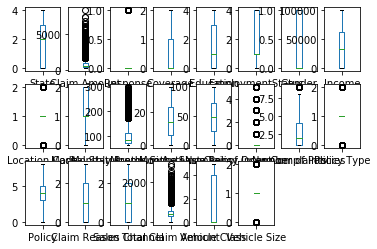

In [26]:
#Checking for outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(3,8))

As we saw above, few outliers are present in Claim Amount and Income.

In [27]:
data.shape

(9134, 22)

In [28]:
#removing outliers present
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [29]:
data.shape

(8470, 22)

Outliers has been removed from dataset

#### SPLITTING DATA

In [30]:
x = data.drop(columns=['Claim Amount'])
y = data[['Claim Amount']]

In [31]:
x.shape

(8470, 21)

In [32]:
y.shape

(8470, 1)

#### USING PCA

In [33]:
pca = PCA(n_components=15)
x = pca.fit_transform(x)
x = pd.DataFrame(data = x)

In [34]:
#Lets scale the data
#Using standard scaler 
ss=SS()
ss.fit(x)
x=ss.transform(x)

#### TRAIN TEST SPLIT

In [35]:
#creating a function for testing and training 

def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    
    print('MAE:', mean_absolute_error(test_y, pred_y))
    print('MSE:', mean_squared_error(test_y, pred_y))
    print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))
    return max_r2_score

In [36]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=5,scoring="r2")

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))
    
    r2_score = round(score.mean()*100)
    return r2_score

In [37]:
#Linear Regression

lr = LR()
r2_lr = best_model(lr)

Max R2 Score Corresponding to random state  71  is  13.0
MAE: 311.9873774490553
MSE: 213551.6347284171
RMSE: 462.1164731195125


In [38]:
r2_lr_cv = cross_val_function(lr)

Cross Val Score:  [0.07336939 0.08955785 0.11628352 0.11256827 0.08000543]
Mean Scores:  0.0943568920821541
Standard deviation:  0.017215701124595733
Score : 9.0


In [39]:
dtr=DTR()
r2_dtr=best_model(dtr)

Max R2 Score Corresponding to random state  56  is  60.0
MAE: 127.37848817579692
MSE: 122780.88300119658
RMSE: 350.40103167827084


In [40]:
r2_dtr_cv = cross_val_function(dtr)

Cross Val Score:  [0.44341558 0.43367914 0.46997483 0.59074786 0.46886329]
Mean Scores:  0.48133613766543154
Standard deviation:  0.05650616627937701
Score : 48.0


In [41]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNR()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 15}

In [42]:
knr = KNR(n_neighbors=15)
r2_knr = best_model(knr)

Max R2 Score Corresponding to random state  63  is  15.0
MAE: 314.3303715188075
MSE: 217292.68025572895
RMSE: 466.1466295659864


In [43]:
r2_knr_cv = cross_val_function(knr)

Cross Val Score:  [0.08947531 0.09692176 0.09399318 0.12487416 0.09887236]
Mean Scores:  0.10082735291537699
Standard deviation:  0.012433017702860476
Score : 10.0


In [44]:
#Finding best parameters for RFR

rfr = RFR() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 200}

In [45]:
rfr=RFR(n_estimators=200)
r2_rfr = best_model(rfr)

Max R2 Score Corresponding to random state  71  is  78.0
MAE: 104.44466400146106
MSE: 63093.806288764725
RMSE: 251.18480505150927


In [46]:
r2_rfr_cv = cross_val_function(rfr)

Cross Val Score:  [0.74115117 0.75419753 0.73091641 0.7864785  0.72744354]
Mean Scores:  0.7480374320844495
Standard deviation:  0.021355659964048413
Score : 75.0


In [47]:
#Checking for GBR()

gbr = GBR()
r2_gbr = best_model(gbr)

Max R2 Score Corresponding to random state  71  is  76.0
MAE: 119.97634623468146
MSE: 66598.7944847732
RMSE: 258.0674223623997


In [48]:
r2_gbr_cv = cross_val_function(gbr)

Cross Val Score:  [0.71968621 0.73306289 0.72199818 0.74930485 0.71933431]
Mean Scores:  0.7286772857257631
Standard deviation:  0.011467092545786449
Score : 73.0


AS RFR GAVE US THE HIGHEST R2 SCORE, WE WILL USE IT AS OUR FINAL MODEL FOR PREDICTION

In [49]:
#RFR gave max score for random state = 73
rfr=RFR(n_estimators=200)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=73)
rfr.fit(train_x,train_y)
pred_y = rfr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print('MAE:', mean_absolute_error(test_y, pred_y))
print('MSE:', mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))

R2 score is :  77.0
MAE: 95.4539996840025
MSE: 49504.89151395609
RMSE: 222.49694720143037


### SAVING MODEL

In [50]:
joblib.dump(rfr, 'Project_16_Auto_Insurance_Claims_amount.pkl')

['Project_16_Auto_Insurance_Claims_amount.pkl']

### CONCLUSION

In this project, I've import dataset from csv, then checked for the data type and unique value counts in each object column, and found that few columns were not useful for our prediction, hence dropped that column from dataset. Plot some graphs with respect to Claim Amount and Total Claim amount and found that average total claim amount in each state is less than claim amount in each state. Then checked for correlation and found that  Total Claim Amount is highly correlated with Monthly Premium, Employement Status, Coverage, Location Code. And negatively correlated with Income. Then splitted the data to x and y and applied PCA to get highly correlated features and applied Scaling. Then applied some algorithm to predict the outcome, and by using multiple techniques found that Random Forest Regressor gave the max score of 78%, and found that model is going through underfitting.